In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

## Thermal diffusivity
https://en.wikipedia.org/wiki/Thermal_diffusivity

$  \frac{\partial u}{\partial t} = \alpha  \frac{\partial^2 u}{\partial x^2}$

In [22]:
# Initial condition
def I(x):
    return np.sin(x)

#copper
a = 1.11e-4
L = np.pi  # 1.0
T = 500.0
Nx = 100
Nt = 100
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = np.linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
F = a*dt/dx**2
u = np.zeros(Nx+1)           # unknown u at new time level
u_1 = np.zeros(Nx+1)           # u at the previous time level

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i])
# u_1[0:3] = 1

In [23]:
a = []
#t = []

for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        u[i] = u_1[i] + F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])

    a.append(u)
    # Insert boundary conditions
    u[0] = 0;  u[Nx] = 0

    # Update u_1 before next step
    u_1= u.copy()    

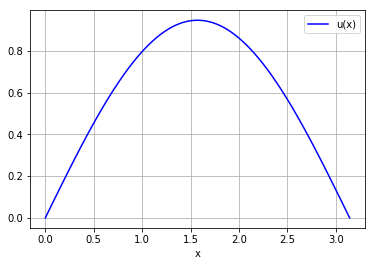

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)   #, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))

ax.plot(x, u_1, 'b', label='u(x)')
#ax.plot(t, sol[:, 1], 'g', label='omega(t)')
ax.legend(loc='best')
ax.set_xlabel('x')
ax.grid()
plt.show()

In [25]:
F

0.56233256921497465